In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
import matplotlib as mpl
mpl.__version__

'2.2.2'

## Binning

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [3]:
top = Table.read_table('top_movies.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Avatar,Fox,760507625,846120800,2009
Titanic,Paramount,658672302,1178627900,1997
Jurassic World,Universal,652270625,687728000,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
The Dark Knight,Warner Bros.,534858444,647761600,2008
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
Star Wars,Fox,460998007,1549640500,1977
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


In [4]:
age = 2017 - top.column('Year')

In [5]:
top = top.with_column('Age', age)

In [6]:
top

Title,Studio,Gross,Gross (Adjusted),Year,Age
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015,2
Avatar,Fox,760507625,846120800,2009,8
Titanic,Paramount,658672302,1178627900,1997,20
Jurassic World,Universal,652270625,687728000,2015,2
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012,5
The Dark Knight,Warner Bros.,534858444,647761600,2008,9
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999,18
Star Wars,Fox,460998007,1549640500,1977,40
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015,2
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012,5


In [7]:
min(top.column('Age')), max(top.column('Age'))

(2, 96)

In [8]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100)

In [9]:
top.bin('Age', bins = my_bins)

bin,Age count
0,13
5,20
10,22
15,38
25,42
40,53
65,12
100,0


In [10]:
sum(top.bin('Age', bins = my_bins).column(1))

200

In [11]:
top.bin('Age', bins = np.arange(0, 101, 25))

bin,Age count
0,93
25,68
50,32
75,7
100,0


In [12]:
top.bin('Age', bins = np.arange(0, 60, 25))

bin,Age count
0,93
25,71
50,0


In [13]:
top.where('Age', 50)

Title,Studio,Gross,Gross (Adjusted),Year,Age
The Jungle Book,Disney,141843612,641015300,1967,50
The Graduate,AVCO,104945305,744517700,1967,50
Guess Who's Coming to Dinner,Columbia,56666667,376335900,1967,50


## Drawing Histograms

**Please run all cells before this cell, including the previous examples and the import cell at the top of the notebook.**

In [14]:
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 100])

In [15]:
top.bin('Age', bins = my_bins)

bin,Age count
0,13
5,20
10,22
15,38
25,42
40,53
65,12
100,0


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


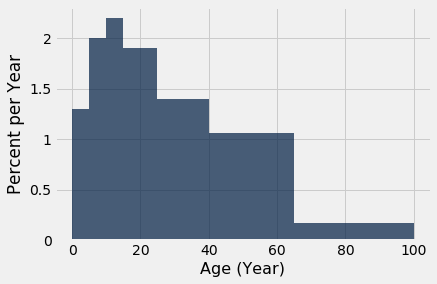

In [16]:
top.hist('Age', bins = my_bins, unit = 'Year')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


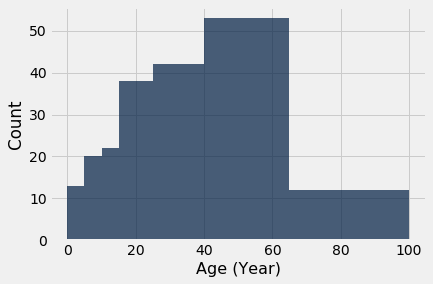

In [17]:
top.hist('Age', bins = my_bins, unit = 'Year', normed = False)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


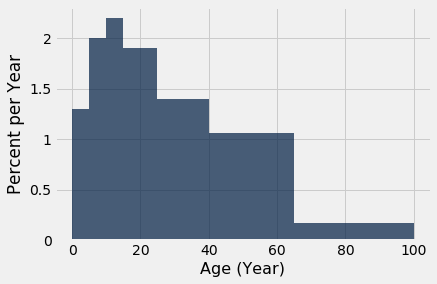

In [18]:
top.hist('Age', bins = my_bins, unit = 'Year')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


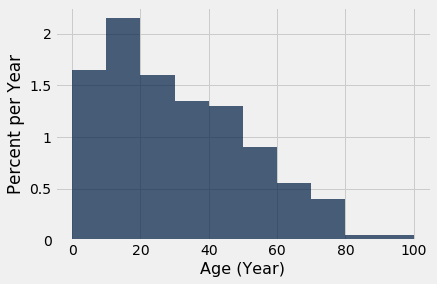

In [19]:
top.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')

## Density

**Please run all cells before this cell, including the previous examples and the import cell at the top of the notebook.**

In [20]:
top.bin('Age', bins = my_bins)

bin,Age count
0,13
5,20
10,22
15,38
25,42
40,53
65,12
100,0


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


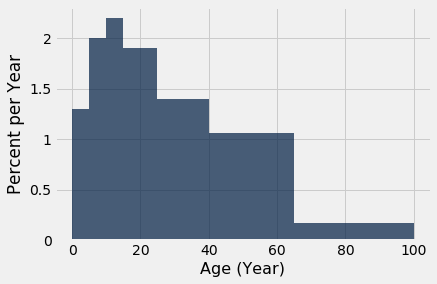

In [21]:
top.hist('Age', bins = my_bins, unit = 'Year')

In [22]:
42/200

0.21

In [23]:
40 - 25

15

In [24]:
21 / 15

1.4

In [25]:
22/200

0.11

In [26]:
11/5

2.2

## Example 2: Income

**Please run all cells before this cell, including the previous examples and the import cell at the top of the notebook.**

In [27]:
incomes = Table.read_table('incomes.csv')
incomes

Name,2016 Income
Jennifer Lawrence,61.7
Scarlett Johansson,57.5
Angelina Jolie,40
Jennifer Aniston,24.75
Anne Hathaway,24
Melissa McCarthy,24
Bingbing Fan,20
Sandra Bullock,20
Cara Delevingne,15
Reese Witherspoon,15


In [28]:
incomes.bin(1, bins = [0, 15, 25, 85])

bin,2016 Income count
0,9
15,8
25,3
85,0


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


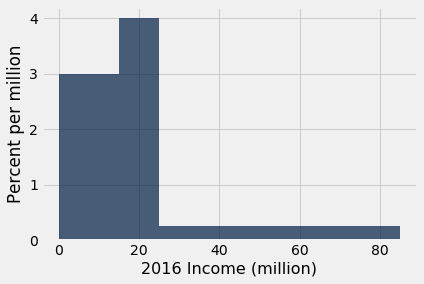

In [29]:
incomes.hist(1, bins = [0, 15, 25, 85], unit = 'million')